# Post-processing of `smallbaselineApp.py`

to extract displacement for the time period of interest

1. Convert average velocity to displacement using `save_roipacl.py`
2. Decompose asc / desc LOS displacement to horz / vert direction using `asc_desc2horz_vert.py`

In [2]:
%matplotlib inline
import os
import numpy as np
from mintpy.utils import readfile, ptime
from mintpy import asc_desc2horz_vert, save_roipac, view

## Dataset Initiation
proj_names = [
    'KirishimaAlosAT424',
    'KirishimaAlosDT73',
    'KirishimaAlos2AT131',
    'KirishimaAlos2DT23',
]

proj_dirs = []
ts_files  = []
vel_files = []
msk_files = []
dem_files = []
unw_files = []
date12s = []
for proj_name in proj_names:
    proj_dir = os.path.expanduser('~/insarlab/Kirishima/{}/mintpy'.format(proj_name))
    ts_file  = os.path.join(proj_dir, 'timeseries_ERA5_ramp_demErr.h5')
    vel_file = os.path.join(proj_dir, 'velocity.h5')
    msk_file = os.path.join(proj_dir, 'maskTempCoh.h5')
    dem_file = os.path.join(proj_dir, 'inputs/gsi10m.dem.wgs84')
    date12 = readfile.read_attribute(vel_file)['DATE12']
    unw_file = os.path.join(proj_dir, '{}.unw'.format(date12))

    ts_files.append(ts_file)
    vel_files.append(vel_file)
    msk_files.append(msk_file)
    dem_files.append(dem_file)
    unw_files.append(unw_file)
    date12s.append(date12)

## horz / vert files
model_dir = os.path.expanduser('~/insarlab/Kirishima/Model/data')
models = ['Kirishima2008post',
          'Kirishima2017pre']
hz_files = [os.path.join(model_dir, '{}Hz.h5'.format(model)) for model in models]
up_files = [os.path.join(model_dir, '{}Up.h5'.format(model)) for model in models]
print('Done.')

Done.


## 1. Velocity to displacement

Project name: KirishimaAlosAT424
time span of displacement: 1.6 years
change reference point to y/x: [180, 158]
read None from file /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/velocity.h5
convert velocity to displacement for 20080929_20100520
convert displacement to phase in radian
mask data based on input file: /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/maskTempCoh.h5
write /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/20080929_20100520.unw
write /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/20080929_20100520.unw.rsc


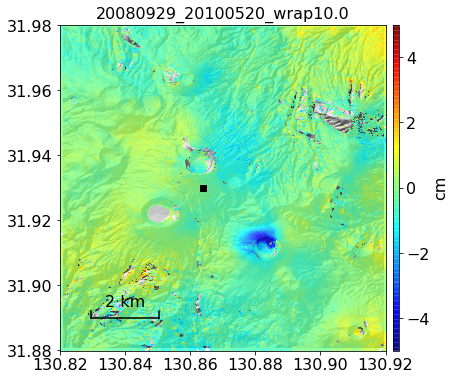

Project name: KirishimaAlosDT73
time span of displacement: 1.4 years
change reference point to y/x: [180, 158]
read None from file /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/velocity.h5
convert velocity to displacement for 20081012_20100302
convert displacement to phase in radian
mask data based on input file: /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/maskTempCoh.h5
write /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/20081012_20100302.unw
write /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/20081012_20100302.unw.rsc


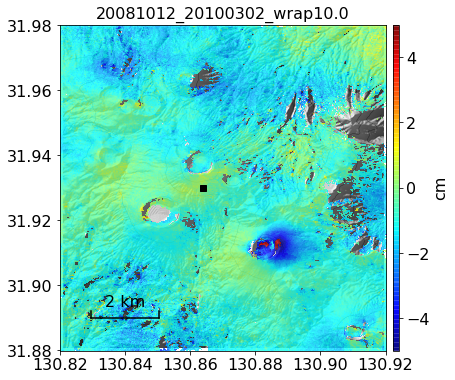

Project name: KirishimaAlos2AT131
time span of displacement: 2.8 years
change reference point to y/x: [270, 238]
read None from file /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/velocity.h5
convert velocity to displacement for 20150106_20171010
convert displacement to phase in radian
mask data based on input file: /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/maskTempCoh.h5
write /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/20150106_20171010.unw
write /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/20150106_20171010.unw.rsc


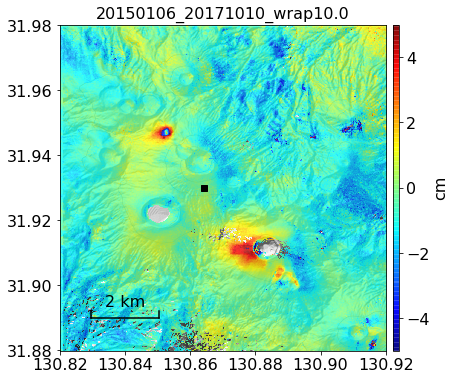

Project name: KirishimaAlos2DT23
time span of displacement: 2.6 years
change reference point to y/x: [270, 238]
read None from file /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/velocity.h5
convert velocity to displacement for 20150209_20170918
convert displacement to phase in radian
mask data based on input file: /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/maskTempCoh.h5
write /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/20150209_20170918.unw
write /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/20150209_20170918.unw.rsc


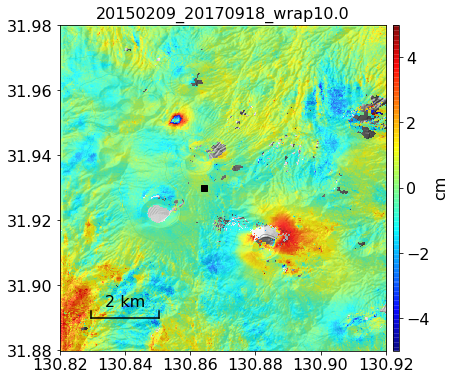

In [4]:
# change reference point to a less noisy location for the time period of interest.
# the original reference point is good for the whole time period
ref_lat, ref_lon = 31.930, 130.864

for i in range(len(proj_names)):
    print('Project name: {}'.format(proj_names[i]))
    tdiff = np.diff(ptime.yyyymmdd2years(date12s[i].split('_')))[0]
    print('time span of displacement: {:.1f} years'.format(tdiff))

    # run
    scp_args = '{v} -m {m} -o {o} --ref-lalo {lat} {lon}'.format(v=vel_files[i], m=msk_files[i], o=unw_files[i], lat=ref_lat, lon=ref_lon)
    save_roipac.main(scp_args.split())

    # plot
    scp_args = '{} --wrap --wrap-range -5 5 -u cm --dem {} --noverbose'.format(unw_files[i], dem_files[i])
    view.main(scp_args.split())

## 2. Asc / desc to horz / vert

asc_desc2horz_vert.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/20080929_20100520.unw /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/20081012_20100302.unw -o /Users/yunjunz/insarlab/Kirishima/Model/data/Kirishima2008postHz.h5 /Users/yunjunz/insarlab/Kirishima/Model/data/Kirishima2008postUp.h5
Input 1st file is .unw
---------------------
reading /Users/yunjunz/insarlab/Kirishima/KirishimaAlosAT424/mintpy/20080929_20100520.unw
heading angle: 349.6238098144531
near   incidence angle : 36.5388 degree
far    incidence angle : 37.2478 degree
center incidence angle : 36.8933 degree
---------------------
reading /Users/yunjunz/insarlab/Kirishima/KirishimaAlosDT73/mintpy/20081012_20100302.unw
heading angle: 190.38851165771484
near   incidence angle : 36.6067 degree
far    incidence angle : 37.3140 degree
center incidence angle : 36.9603 degree
---------------------
writing horizontal component to file: /Users/yunjunz/insarlab/Kirishima/Model/data/Kirishima2008postH

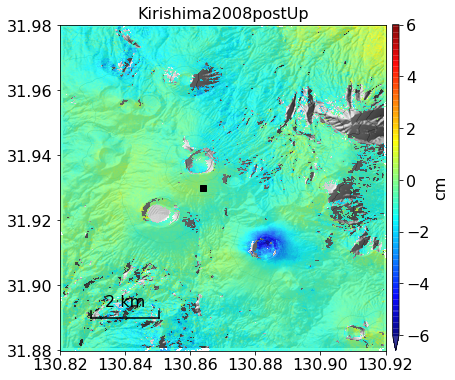

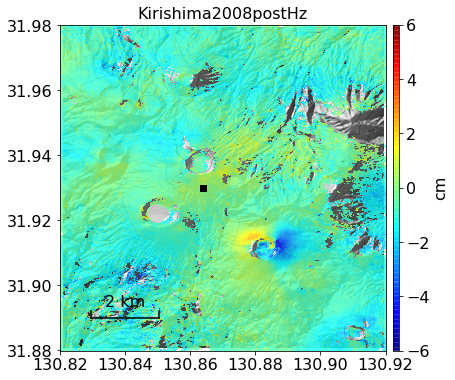

asc_desc2horz_vert.py /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/20150106_20171010.unw /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/20150209_20170918.unw -o /Users/yunjunz/insarlab/Kirishima/Model/data/Kirishima2017preHz.h5 /Users/yunjunz/insarlab/Kirishima/Model/data/Kirishima2017preUp.h5
Input 1st file is .unw
---------------------
reading /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2AT131/mintpy/20150106_20171010.unw
heading angle: 350.1998291015625
near   incidence angle : 41.1804 degree
far    incidence angle : 41.7549 degree
center incidence angle : 41.4677 degree
---------------------
reading /Users/yunjunz/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/20150209_20170918.unw
heading angle: 190.44842529296875
near   incidence angle : 34.1344 degree
far    incidence angle : 34.9168 degree
center incidence angle : 34.5256 degree
---------------------
writing horizontal component to file: /Users/yunjunz/insarlab/Kirishima/Model/data/Kirishima2017pre

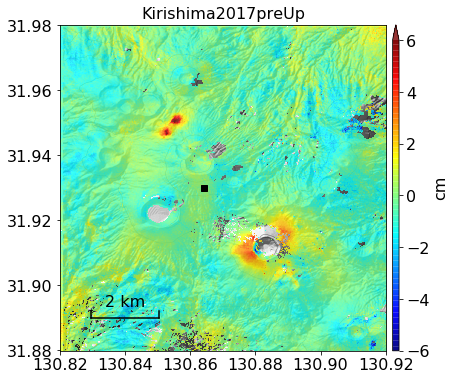

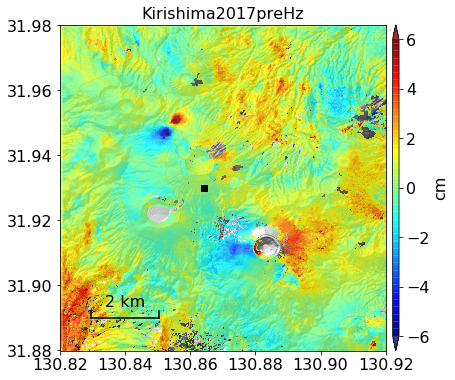

In [5]:
for i in range(len(models)):
    # run
    scp_args = '{f1} {f2} -o {o1} {o2}'.format(f1=unw_files[2*i], f2=unw_files[2*i+1], o1=hz_files[i], o2=up_files[i])
    print('asc_desc2horz_vert.py', scp_args)
    asc_desc2horz_vert.main(scp_args.split())

    # plot
    view.main('{} -u cm -v -6 6 --dem {} --noverbose'.format(up_files[i], dem_files[2*i]).split())
    view.main('{} -u cm -v -6 6 --dem {} --noverbose'.format(hz_files[i], dem_files[2*i]).split())